# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow opencv-python mediapipe==0.8.9.1  matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
draw_landmarks(frame, results)

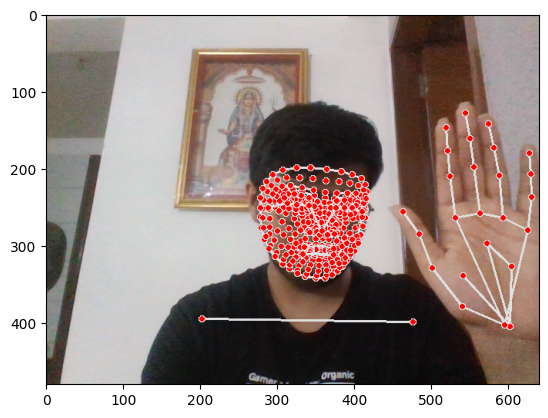

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [16]:
len(results.left_hand_landmarks.landmark)

21

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
result_test = extract_keypoints(results)

In [22]:
result_test

array([ 0.56026596,  0.58688372, -0.9990508 , ...,  0.        ,
        0.        ,  0.        ])

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.56026596,  0.58688372, -0.9990508 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['1', '2', '3', '4', '5','call', 'Day', 'drink', 'eat', 'food', 'Full', 'Go', 'good', 'hello', 'Home', 'I', 'Knock', 'no', 'on', 'sleep', 'Throw', 'time', 'walk', 'Water', 'we', 'what', 'write', 'yes', 'you', 'your'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start

In [26]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'MP_Data\\hello'

# 5. Collect Keypoint Values for Training and Testing

In [35]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 'call': 5,
 'Day': 6,
 'drink': 7,
 'eat': 8,
 'food': 9,
 'Full': 10,
 'Go': 11,
 'good': 12,
 'hello': 13,
 'Home': 14,
 'I': 15,
 'Knock': 16,
 'no': 17,
 'on': 18,
 'sleep': 19,
 'Throw': 20,
 'time': 21,
 'walk': 22,
 'Water': 23,
 'we': 24,
 'what': 25,
 'write': 26,
 'yes': 27,
 'you': 28,
 'your': 29}

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [92]:
np.array(sequences).shape

(1500, 30, 1662)

In [93]:
np.array(labels).shape

(1500,)

In [94]:
X = np.array(sequences)

In [95]:
X.shape

(1500, 30, 1662)

In [96]:
y = to_categorical(labels).astype(int)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [98]:
y_test.shape

(75, 30)

# 7. Build and Train CNN

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


input_size = 1662
sequence_length = 30
output_size = 30  

# Define a model with 1D Convolutional layers and Dense layers
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, input_size)),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(output_size, activation='linear')
])

# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='Adam',
              loss='mean_squared_error')  # Use mean squared error for regression

# Train the model
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Evaluate the model on test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")

Epoch 1/200
45/45 [==============================] - 3s 27ms/step - loss: 0.0856 - val_loss: 0.1399
Epoch 2/200
45/45 [==============================] - 1s 18ms/step - loss: 0.0296 - val_loss: 0.0541
Epoch 3/200
45/45 [==============================] - 1s 18ms/step - loss: 0.0257 - val_loss: 0.0425
Epoch 4/200
45/45 [==============================] - 1s 17ms/step - loss: 0.0243 - val_loss: 0.0388
Epoch 5/200
45/45 [==============================] - 1s 17ms/step - loss: 0.0226 - val_loss: 0.0333
Epoch 6/200
45/45 [==============================] - 1s 17ms/step - loss: 0.0222 - val_loss: 0.0314
Epoch 7/200
45/45 [==============================] - 1s 17ms/step - loss: 0.0206 - val_loss: 0.0336
Epoch 8/200
45/45 [==============================] - 1s 17ms/step - loss: 0.0188 - val_loss: 0.0299
Epoch 9/200
45/45 [==============================] - 1s 17ms/step - loss: 0.0175 - val_loss: 0.0303
Epoch 10/200
45/45 [==============================] - 1s 17ms/step - loss: 0.0158 - val_loss: 0.0441

In [13]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 28, 64)            319168    
                                                                 
 batch_normalization_2 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 14, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 batch_normalization_3 (Bat  (None, 12, 128)           512       
 chNormalization)                                                
                                                      

# 8. Make Predictions

In [53]:
res = model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


In [54]:
actions[np.argmax(res[4])]

'write'

In [55]:
actions[np.argmax(y_test[4])]

'write'

# 9. Save Weights

In [31]:
model.save('action.h5')

In [217]:
del model

In [61]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [99]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [100]:
yhat = model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


In [101]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [102]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[73,  0],
        [ 0,  2]],

       [[69,  0],
        [ 0,  6]],

       [[73,  0],
        [ 0,  2]],

       [[72,  2],
        [ 0,  1]],

       [[72,  1],
        [ 0,  2]],

       [[73,  0],
        [ 0,  2]],

       [[72,  0],
        [ 0,  3]],

       [[72,  0],
        [ 0,  3]],

       [[72,  0],
        [ 0,  3]],

       [[71,  0],
        [ 0,  4]],

       [[71,  0],
        [ 0,  4]],

       [[71,  0],
        [ 0,  4]],

       [[71,  0],
        [ 2,  2]],

       [[72,  0],
        [ 0,  3]],

       [[74,  0],
        [ 0,  1]],

       [[70,  0],
        [ 0,  5]],

       [[71,  0],
        [ 0,  4]],

       [[73,  0],
        [ 0,  2]],

       [[74,  0],
        [ 0,  1]],

       [[73,  0],
        [ 0,  2]],

       [[73,  0],
        [ 0,  2]],

       [[71,  0],
        [ 0,  4]],

       [[74,  0],
        [ 0,  1]],

       [[72,  0],
        [ 0,  3]],

       [[71,  0],
        [ 0,  4]],

       [[73,  0],
        [ 1,  1]],

       [[74,

In [103]:
accuracy_score(ytrue, yhat)

0.96

# 11. Test in Real Time

In [56]:
from scipy import stats

In [111]:
import cv2
import random

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

def prob_viz(res, actions, input_frame,colors):
    output_frame = input_frame.copy()
    
    # Combine results with actions and sort by probabilities
    combined = list(zip(res, actions))
    combined.sort(reverse=True, key=lambda x: x[0])  # Sort by probability in descending order
    
    # Visualize up to top 5 probable actions
    for num, (prob, action) in enumerate(combined[:5]):
        chosen_color = random.choice(colors)
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), chosen_color, -1)
        cv2.putText(output_frame, action, (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame


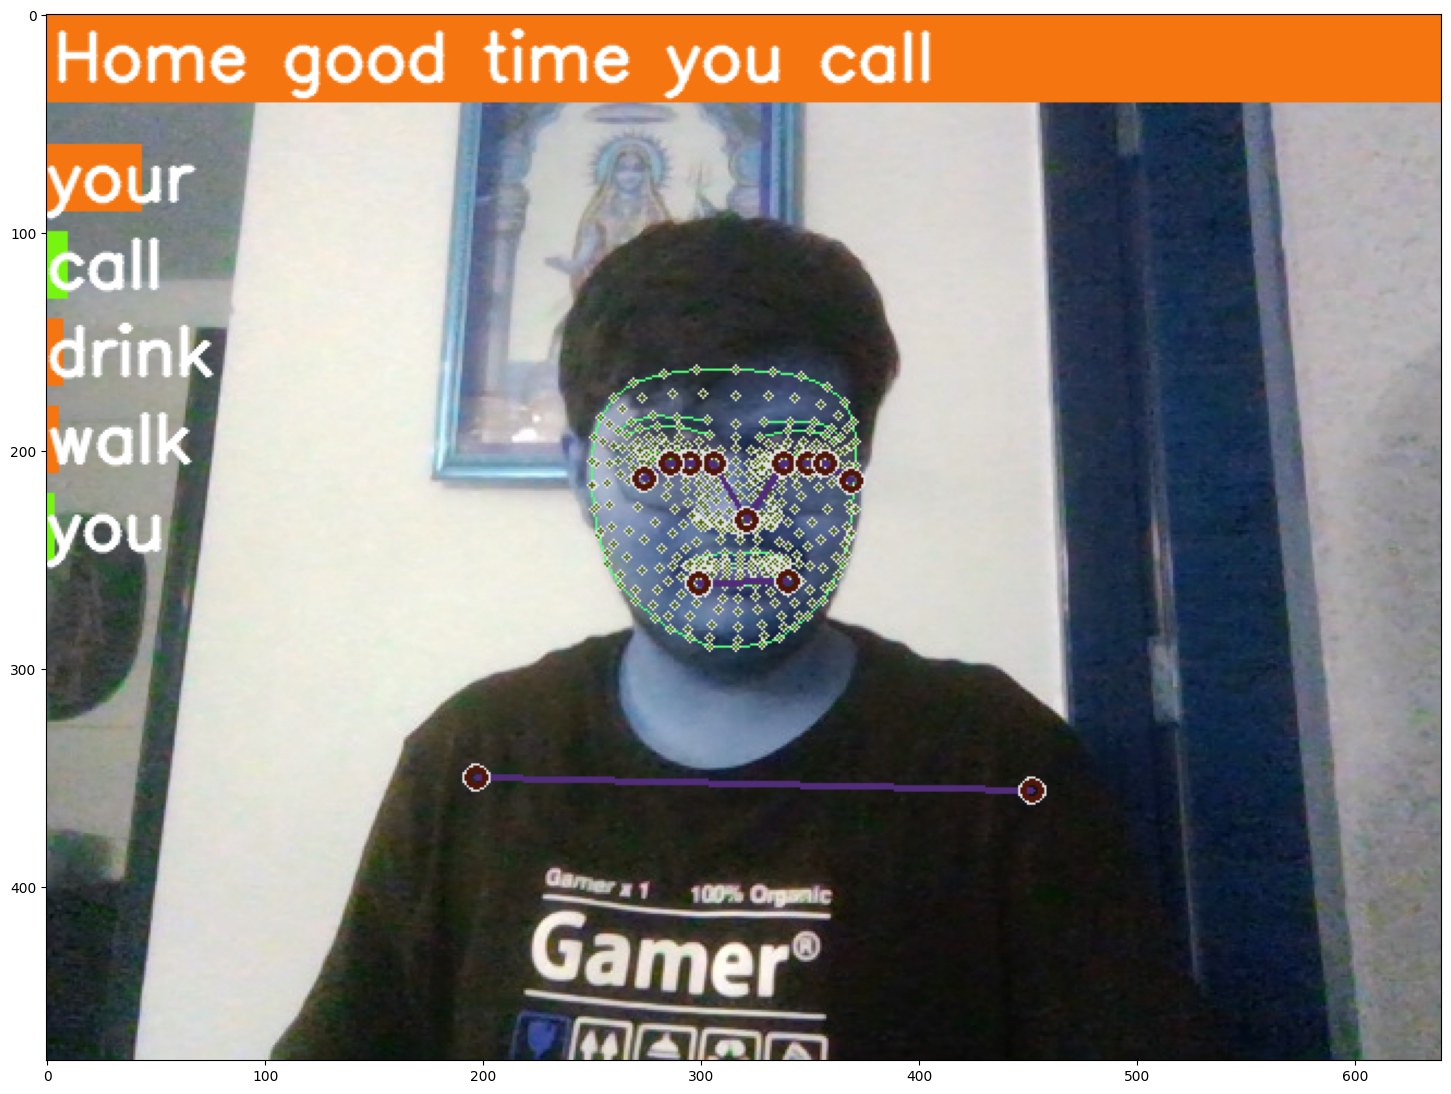

In [114]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [113]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\Henil\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti